# Tehtävä 1
Opetellaan Fourier-muunnoksen toiminta seuraavasti:
Tehdään testisignaali, jossa on N = 10 näytettä.
Näytetaajuus Fs = 100
taajuusresoluutio on siis Fs/N = 10 Hz
Tarkoittaa siis sitä, että fourier-muunnostuloksessa on 10 tulosta ja
ne tarkoittavat eri taajuuksia seuraavasti:
X(0) = 0Hz
X(1) = 10 Hz
X(2) = 20 Hz
X(3) = 30 Hz
X(4) = 40 Hz
X(5) = 50 Hz
X(6) = -40 Hz
X(7) = -30 Hz
X(8) = -20 Hz
X(9) = -10 Hz

a) Tehdään 10 Hz taajuinen kosini signaali, joka on näytteistetty
   taajuudella Fs = 100. Otetaan tuosta signaalista ensimmäiset
   10 näytettä eli N = 10. Tulostetaan kuva plt.subplot() funktion avulla
   siten, että kuvassa on 10 riviä ja 2 saraketta seuraavasti:
   riville 1 => X(0) laskennassa käytetyt "referenssi signaalit"
   riville 2 => X(1) laskennassa käytetyt "referenssi signaalit"
   ...
   riville 10 => X(9) laskennan ref signaalit.

b) Nopeille: Tee python aliohjelma, jolla voit laskea fourier-muunnos kaavan
   mukaiset tulokset. Vinkki: Tee joku testisignaali, josta lasket
   FFt:n np.fft.fft(signaali) -funktion avulla ja värkkäät sitten niin
   kauan, että oma funktiosi antaa saman tuloksen kuin numPy:n funktio

100


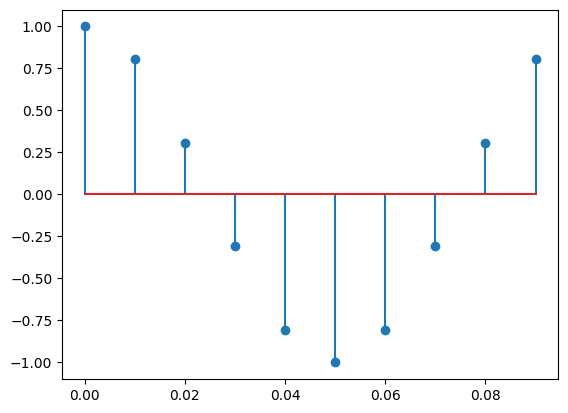

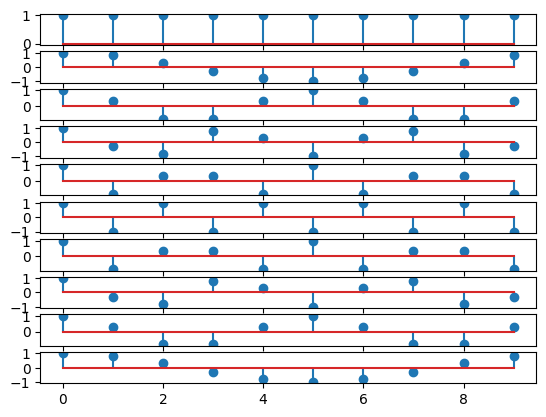

In [50]:
import numpy as np
import matplotlib.pyplot as plt
Fs = 100
Ts =1/Fs
N = 10

t = np.arange(0,1,Ts)
M = len(t)
print(M)
sig = np.cos(2*np.pi*10*t)
plt.stem(t[0:N],sig[0:N])
plt.show()

testisignaali = sig[0:N]
#print(testiSignaali)
i= complex(0,1)

vertailuSignaali = np.zeros((10,10), dtype=complex)

#print(vertailuSignaali)

 
plt.subplot(10,1,1)
for k in range(N):
    #print(k)
    plt.subplot(10,1,k+1)
    for n in range(N):
        vertailuSignaali[k][n] = np.exp(-i*(2*np.pi*k*n)/N)
    plt.stem(np.real(vertailuSignaali[k][0:N]))
#plt.subplot(10,2,2)
#plt.stem(t[0:N], np.imag(vertailuSignaali))
plt.show()

#print(vertailuSignaali)


# Tehtävä 2

Opetellaan kuvan suodattaminen. käytetään cameraman.png tiedoston kuva

a) suodatetaan ensin kuva numpyn ja pythonin eri kirjastofunktioiden avulla. Etsitään esimerkkejä miten tuo tehdään chatGPT:n avulla

b) tehdään oma funktio, joka tekee samanlaisen kuvan suodatuksen

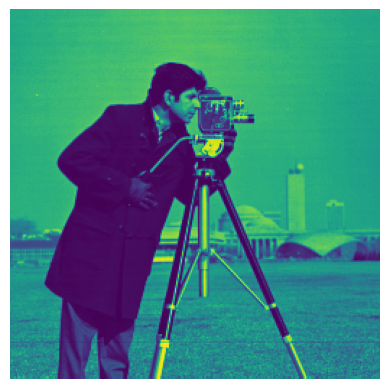

In [49]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = Image.open('./cameraman.png')
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()